In [12]:
#Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lib for NLP processing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vssan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Dataset couldn't be uploaded in github because of its huge size
# Link ------>  https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [13]:
# Importing the files
real_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')
real_news.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
# Numbers of rows and columns of dataset
print(real_news.shape)
print(fake_news.shape)

(21417, 4)
(23481, 4)


In [15]:
# Adding labels to each dataset (0 or 1)
real_news['labels'] = 1
fake_news['labels'] = 0

In [16]:
# Concatenate both the data sets
News_Dataset = pd.concat([real_news, fake_news], ignore_index=True)
News_Dataset.head()

,title,text,subject,date,labels
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [17]:
#size of new dataset
print(News_Dataset.shape)

(44898, 5)


In [18]:
#Removing unnecessary columns
News_Dataset = News_Dataset.drop(['text', 'subject', 'date'], axis = 1)
News_Dataset

,title,labels
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44896,How to Blow $700 Million: Al Jazeera America F...,0


In [19]:
# Counting label values in new dataset
News_Dataset.labels.value_counts()

0    23481
1    21417
Name: labels, dtype: int64

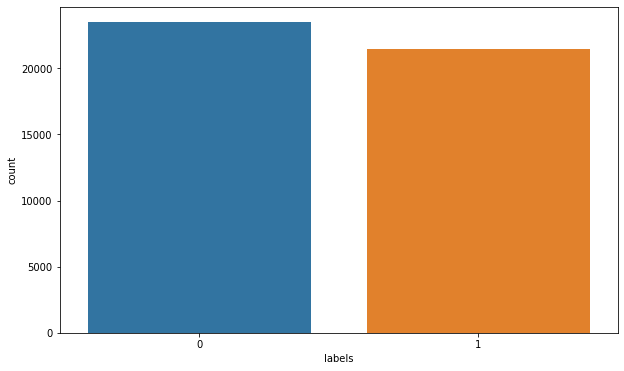

In [20]:
# Simple graph showing real and fake news
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = News_Dataset, x='labels')
plt.show()

In [21]:
# Checking for null rows/columns
News_Dataset[News_Dataset.isnull().any(axis=1)]

,title,labels


In [25]:
# importing the package for nlp
# note: I'm again importing it to download omw-1.4 which is missing im my pc
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vssan\AppData\Roaming\nltk_data...


True

In [26]:
# The most important part of the code
# 1) removing all symbols
# 2) changing capital into small letters
# 3) ingnore meaningless sentence
# 4) at end we implement Lemmatization for converting a word to its base form.

nltk.download('wordnet')
wordnet=WordNetLemmatizer()
corpus = []

for i in range(0, len(News_Dataset)):
    review = re.sub('[^a-zA-Z]', ' ', News_Dataset['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vssan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(2,2))
X = cv.fit_transform(corpus).toarray()

In [28]:
X.shape

(44898, 5000)

In [29]:
y=News_Dataset['labels']

In [32]:
## Splitting data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [33]:
cv.get_feature_names()[:20]

['abc news',
 'abe say',
 'abortion law',
 'abortion right',
 'abortion video',
 'absolutely destroys',
 'accept election',
 'access pipeline',
 'accuses obama',
 'accuses trump',
 'across america',
 'act terror',
 'acting like',
 'action gun',
 'action north',
 'active shooter',
 'actor george',
 'actor james',
 'ad campaign',
 'ad video']

In [34]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,abc news,abe say,abortion law,abortion right,abortion video,absolutely destroys,accept election,access pipeline,accuses obama,accuses trump,...,young woman,yr old,zika funding,zika virus,zimbabwe army,zimbabwe military,zimbabwe mnangagwa,zimbabwe mugabe,zimbabwe opposition,zimbabwe ruling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Multinomial models are more suited for processing text related features extracted using Bag of words
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [36]:
from sklearn import metrics
import numpy as np
import itertools

In [37]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.809


Confusion matrix, without normalization


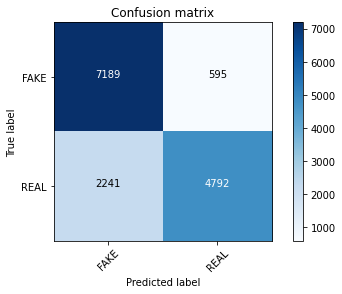

In [38]:
# We use confusion matrix to visualize the bag of words
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [39]:
# Accuracy of our model
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8085982317608152